<a href="https://colab.research.google.com/github/Faareh-Ahmed/Cat_and_Dog_Breed_classsification/blob/main/CatAndDogBreed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"faarehahmed","key":"0ea6e7c3d7bd40520a62713a6f982c7c"}'}

In [3]:
! mkdir ~/kaggledata
! cp kaggle.json ~/kaggledata/
! chmod 600 ~/kaggledata/kaggle.json
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [4]:
!kaggle datasets download -d zippyz/cats-and-dogs-breeds-classification-oxford-dataset

Dataset URL: https://www.kaggle.com/datasets/zippyz/cats-and-dogs-breeds-classification-oxford-dataset
License(s): CC-BY-SA-4.0
 98% 765M/780M [00:10<00:00, 88.0MB/s]
100% 780M/780M [00:10<00:00, 79.1MB/s]


In [5]:
!unzip cats-and-dogs-breeds-classification-oxford-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/images/Sphynx_9.jpg  
  inflating: images/images/Sphynx_90.jpg  
  inflating: images/images/Sphynx_91.jpg  
  inflating: images/images/Sphynx_92.jpg  
  inflating: images/images/Sphynx_93.jpg  
  inflating: images/images/Sphynx_94.jpg  
  inflating: images/images/Sphynx_95.jpg  
  inflating: images/images/Sphynx_96.jpg  
  inflating: images/images/Sphynx_98.jpg  
  inflating: images/images/Sphynx_99.jpg  
  inflating: images/images/american_bulldog_10.jpg  
  inflating: images/images/american_bulldog_100.jpg  
  inflating: images/images/american_bulldog_101.jpg  
  inflating: images/images/american_bulldog_102.jpg  
  inflating: images/images/american_bulldog_103.jpg  
  inflating: images/images/american_bulldog_104.jpg  
  inflating: images/images/american_bulldog_105.jpg  
  inflating: images/images/american_bulldog_106.jpg  
  inflating: images/images/american_bulldog_107.jpg  
  inflating: images/images/american

In [6]:
!pwd

/content


# Downloading the Necessary Libraries

In [7]:
pip install tensorflow --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 33.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [10]:
IMG_SHAPE = (250,250)
IMG_SHAPE_GN = (250,250,3)

# Reading Annotations Folder to get information about the Data

In [11]:
#reading csv
df = pd.read_csv('/content/annotations/annotations/list.txt')

#The first 4 rows consists of the information about breeds
info = df.head(4).copy()

In [12]:
#Reading the data after 5th row
df = df.loc[5:,]

#Processing the columns
df[['CLASS-ID','SPECIES','BREED','ID']] = df['#Image CLASS-ID SPECIES BREED ID'].str.split(expand=True)

#Dropping unnecessary columns
df = df.drop('#Image CLASS-ID SPECIES BREED ID',axis=1)

#renaming the columns
df = df.rename(columns={"CLASS-ID": "image", "SPECIES": "CLASS-ID", 'BREED' : "SPECIES", "ID":"BREED ID"})


#converting the object type to int type
df[["CLASS-ID","SPECIES","BREED ID"]] = df[["CLASS-ID","SPECIES","BREED ID"]].astype(int)

<ipython-input-12-18b912c3ee20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['CLASS-ID','SPECIES','BREED','ID']] = df['#Image CLASS-ID SPECIES BREED ID'].str.split(expand=True)
<ipython-input-12-18b912c3ee20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['CLASS-ID','SPECIES','BREED','ID']] = df['#Image CLASS-ID SPECIES BREED ID'].str.split(expand=True)
<ipython-input-12-18b912c3ee20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [13]:
df

,image,CLASS-ID,SPECIES,BREED ID
5,Abyssinian_100,1,1,1
6,Abyssinian_101,1,1,1
7,Abyssinian_102,1,1,1
8,Abyssinian_103,1,1,1
9,Abyssinian_104,1,1,1
...,...,...,...,...
7349,yorkshire_terrier_96,37,2,25
7350,yorkshire_terrier_97,37,2,25
7351,yorkshire_terrier_98,37,2,25
7352,yorkshire_terrier_99,37,2,25


In [14]:
df['image'] = df['image'].apply(lambda x : str(x)+'.jpg')
df = df.reset_index()
df = df.drop('index',axis=1)

In [15]:
df

,image,CLASS-ID,SPECIES,BREED ID
0,Abyssinian_100.jpg,1,1,1
1,Abyssinian_101.jpg,1,1,1
2,Abyssinian_102.jpg,1,1,1
3,Abyssinian_103.jpg,1,1,1
4,Abyssinian_104.jpg,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96.jpg,37,2,25
7345,yorkshire_terrier_97.jpg,37,2,25
7346,yorkshire_terrier_98.jpg,37,2,25
7347,yorkshire_terrier_99.jpg,37,2,25


In [16]:
#Extracting the classname/breed of the animal
df['classname'] = df['image'].apply(lambda x: str(x)[0:str(x).index('_')])


In [17]:
df

,image,CLASS-ID,SPECIES,BREED ID,classname
0,Abyssinian_100.jpg,1,1,1,Abyssinian
1,Abyssinian_101.jpg,1,1,1,Abyssinian
2,Abyssinian_102.jpg,1,1,1,Abyssinian
3,Abyssinian_103.jpg,1,1,1,Abyssinian
4,Abyssinian_104.jpg,1,1,1,Abyssinian
...,...,...,...,...,...
7344,yorkshire_terrier_96.jpg,37,2,25,yorkshire
7345,yorkshire_terrier_97.jpg,37,2,25,yorkshire
7346,yorkshire_terrier_98.jpg,37,2,25,yorkshire
7347,yorkshire_terrier_99.jpg,37,2,25,yorkshire


# Visualizing the Species

In [18]:
def breed_count(df, title):
    breed_count  = df['classname'].value_counts()

    plt.figure(figsize=(20,5))
    sns.barplot(x=breed_count.index, y=breed_count.values, alpha=0.8)
    plt.title('Value count of number of ' + title)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Breed Names', fontsize=10)
    plt.xticks(rotation=90)
    plt.show()


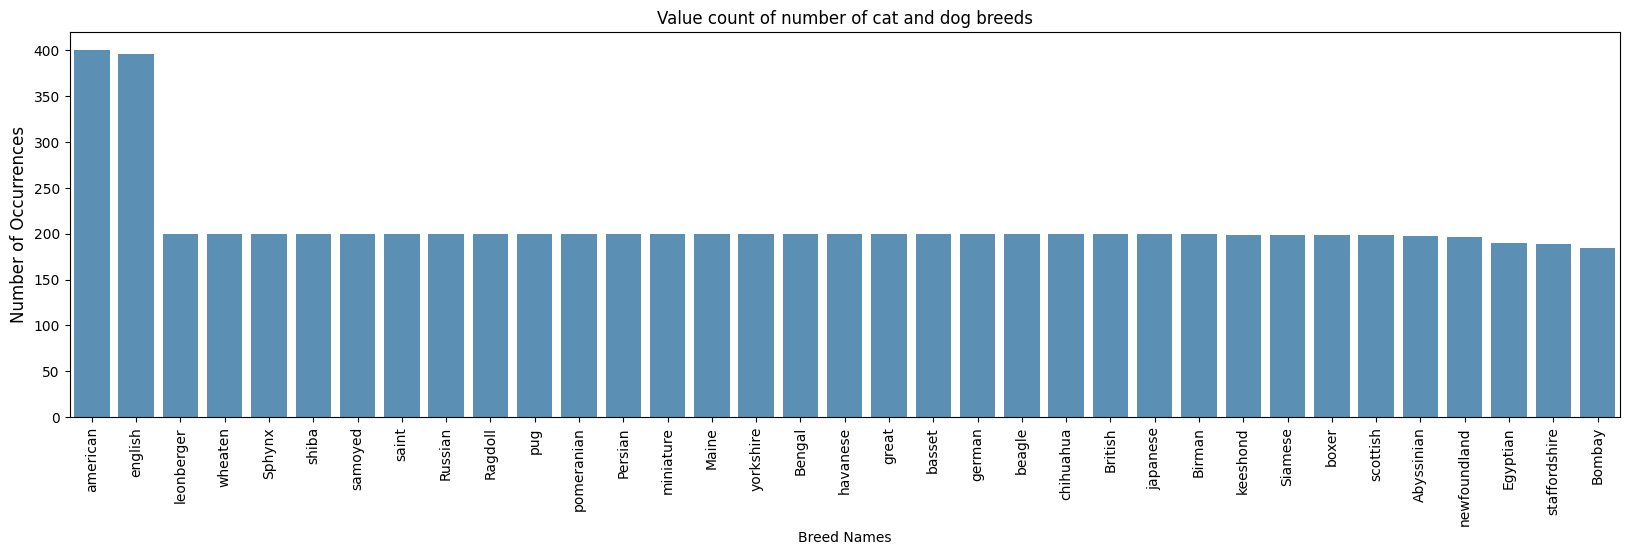

In [19]:
breed_count(df, "cat and dog breeds")


# Separating Cats and Dogs Specie

In [20]:
df_cat = df[df['SPECIES']==1] #cat : 1
df_dog = df[df['SPECIES']==2] #dog : 2
print("Number of samples in df_cat ",df_cat.shape[0])
print("Number of samples in df_dog ",df_dog.shape[0])

Number of samples in df_cat  2371
Number of samples in df_dog  4978


# Cat Species

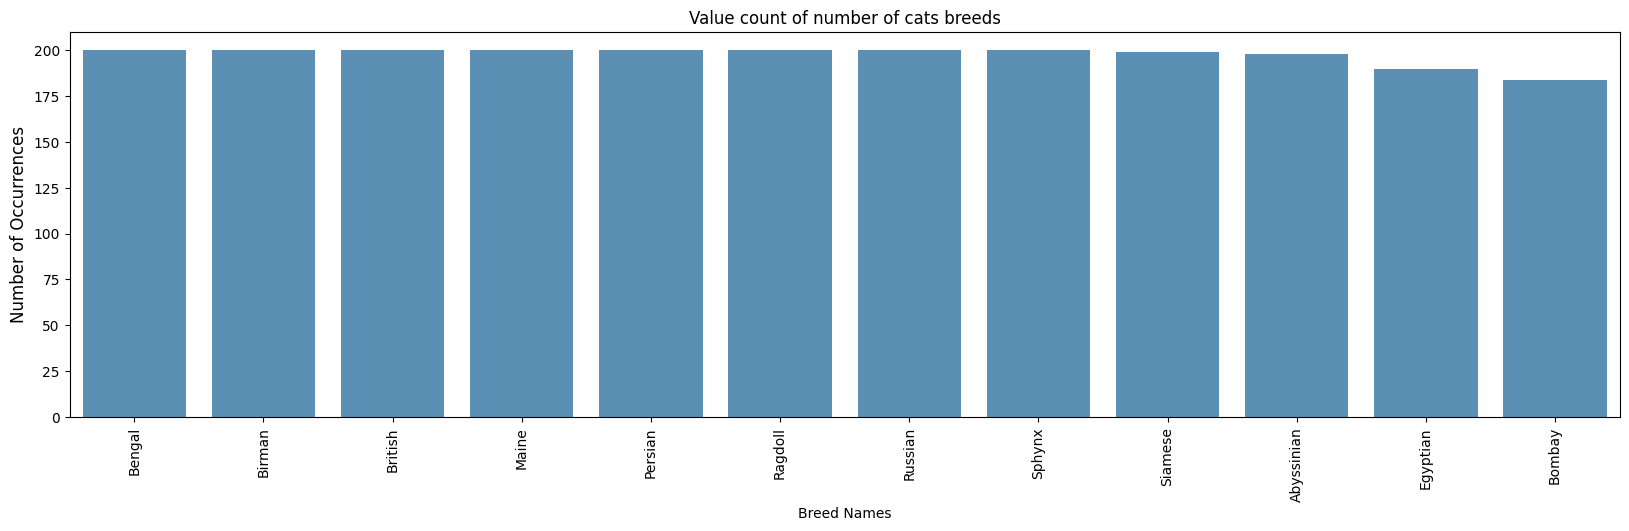

In [21]:
breed_count(df_cat, "cats breeds")

# Dog Species

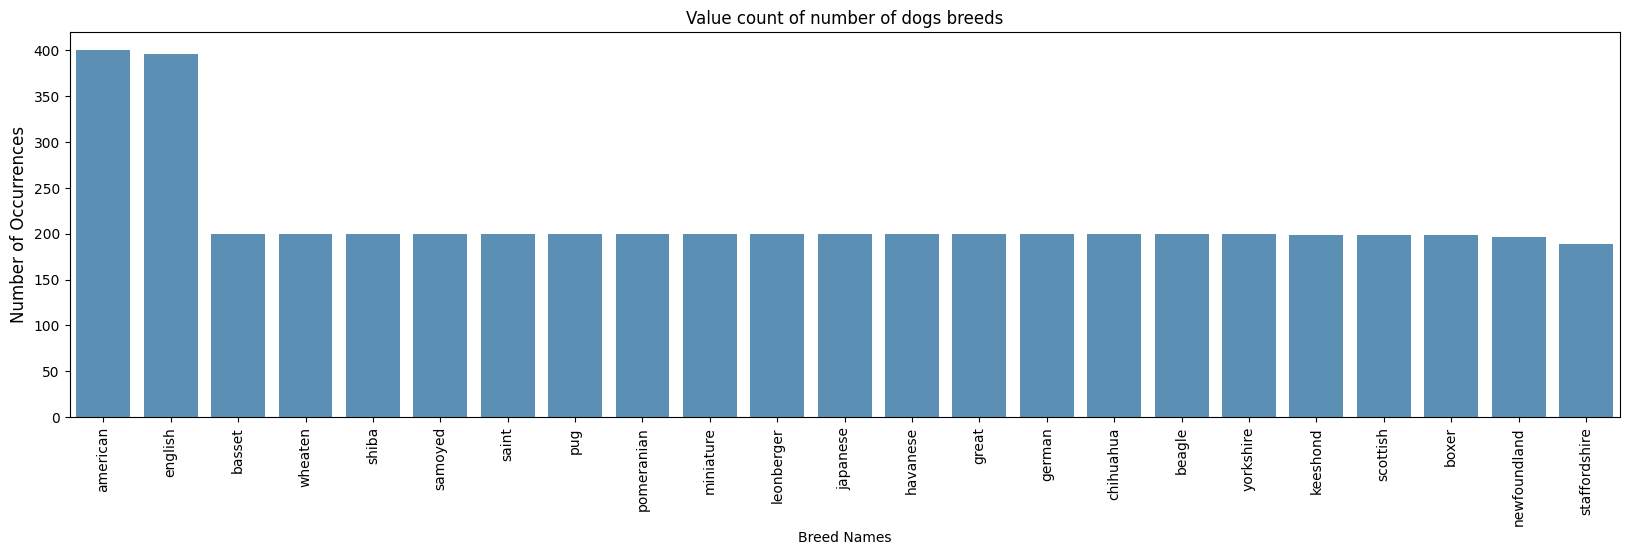

In [22]:
breed_count(df_dog, "dogs breeds")

# **Process Image**

In [23]:
def process(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (250,250))
    img = tf.keras.applications.mobilenet.preprocess_input(img)
    img = np.expand_dims(img, axis=0)
    return img

# Read image
def get_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


# **Visualize Samples**

In [24]:
pwd

'/content'

In [37]:
def visualize_samples(datagen, row_col_len=4, figsize=None):
    random_indexes = np.random.randint(0, len(datagen.labels), row_col_len**2)

    classes = np.array(list(datagen.class_indices))
    labels = classes[np.array(datagen.labels)[random_indexes]]
    filepaths = pd.Series(datagen.filenames)[random_indexes]
    filepaths = "/content/images/images/" + filepaths

    images = filepaths.apply(get_image).reset_index(drop=True)
    figsize = figsize or np.array((row_col_len, row_col_len)) * 4
    fig, ax = plt.subplots(row_col_len, row_col_len, figsize=figsize)
    for i in range(row_col_len):
        for j in range(row_col_len):
            sample_index = i * row_col_len + j
            ax[i,j].imshow(images[sample_index])
            ax[i,j].set_title(labels[sample_index])
            ax[i,j].set_axis_off()
    plt.show()

# Visualize Classification

In [32]:
def visualize_classifications(model, datagen, row_col_len=4, figsize=None):
    random_indexes = np.random.randint(0, len(datagen.labels), row_col_len**2)

    classes = np.array(list(datagen.class_indices))
    labels = classes[np.array(datagen.labels)[random_indexes]]
    filepaths = pd.Series(datagen.filenames)[random_indexes]
    filepaths = "/content/images/images" + filepaths
#     print(filepaths[0])
    images = filepaths.apply(get_image).reset_index(drop=True)
    processed_images = np.vstack(images.apply(process).to_numpy()[:])

    y_pred = classes[np.argmax(model.predict(processed_images, verbose=0), axis=1)]
    y_true = labels

    figsize = figsize or np.array((row_col_len, row_col_len)) * 4
    fig, ax = plt.subplots(row_col_len, row_col_len, figsize=figsize)

    for i in range(row_col_len):
        for j in range(row_col_len):
            sample_index = i * row_col_len + j
            ax[i,j].imshow(images[sample_index])
            ax[i,j].set_title(f"Y true({y_true[sample_index]}) | Y pred ({y_pred[sample_index]})")
            ax[i,j].set_axis_off()
    plt.show()

# Data Augmentation


In [33]:
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    validation_split=0.2,
                                    rotation_range=90,
                                    width_shift_range=0.2,
                                   height_shift_range=0.2
                                  )


validation_datagen = ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.2)

In [34]:
def datagen_flow_dataframe(df,train_datagen,validation_datagen):

    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=df,
        directory='/content/images/images',
        x_col="image",
        y_col='classname',
        target_size=IMG_SHAPE,
        batch_size=128,
        class_mode="categorical",
        subset='training'
)

    valid_gen_flow = validation_datagen.flow_from_dataframe(
            dataframe=df,
            directory='/content/images/images',
            x_col='image',
            y_col='classname',
            target_size=IMG_SHAPE,
            batch_size=128,
            class_mode="categorical",
            subset='validation', shuffle=False)

    return train_gen_flow, valid_gen_flow


# Cat Generator

In [35]:
train_gen_flow_cat, valid_gen_flow_cat = datagen_flow_dataframe(df_cat,train_datagen,validation_datagen)


Found 1897 validated image filenames belonging to 12 classes.
Found 474 validated image filenames belonging to 12 classes.


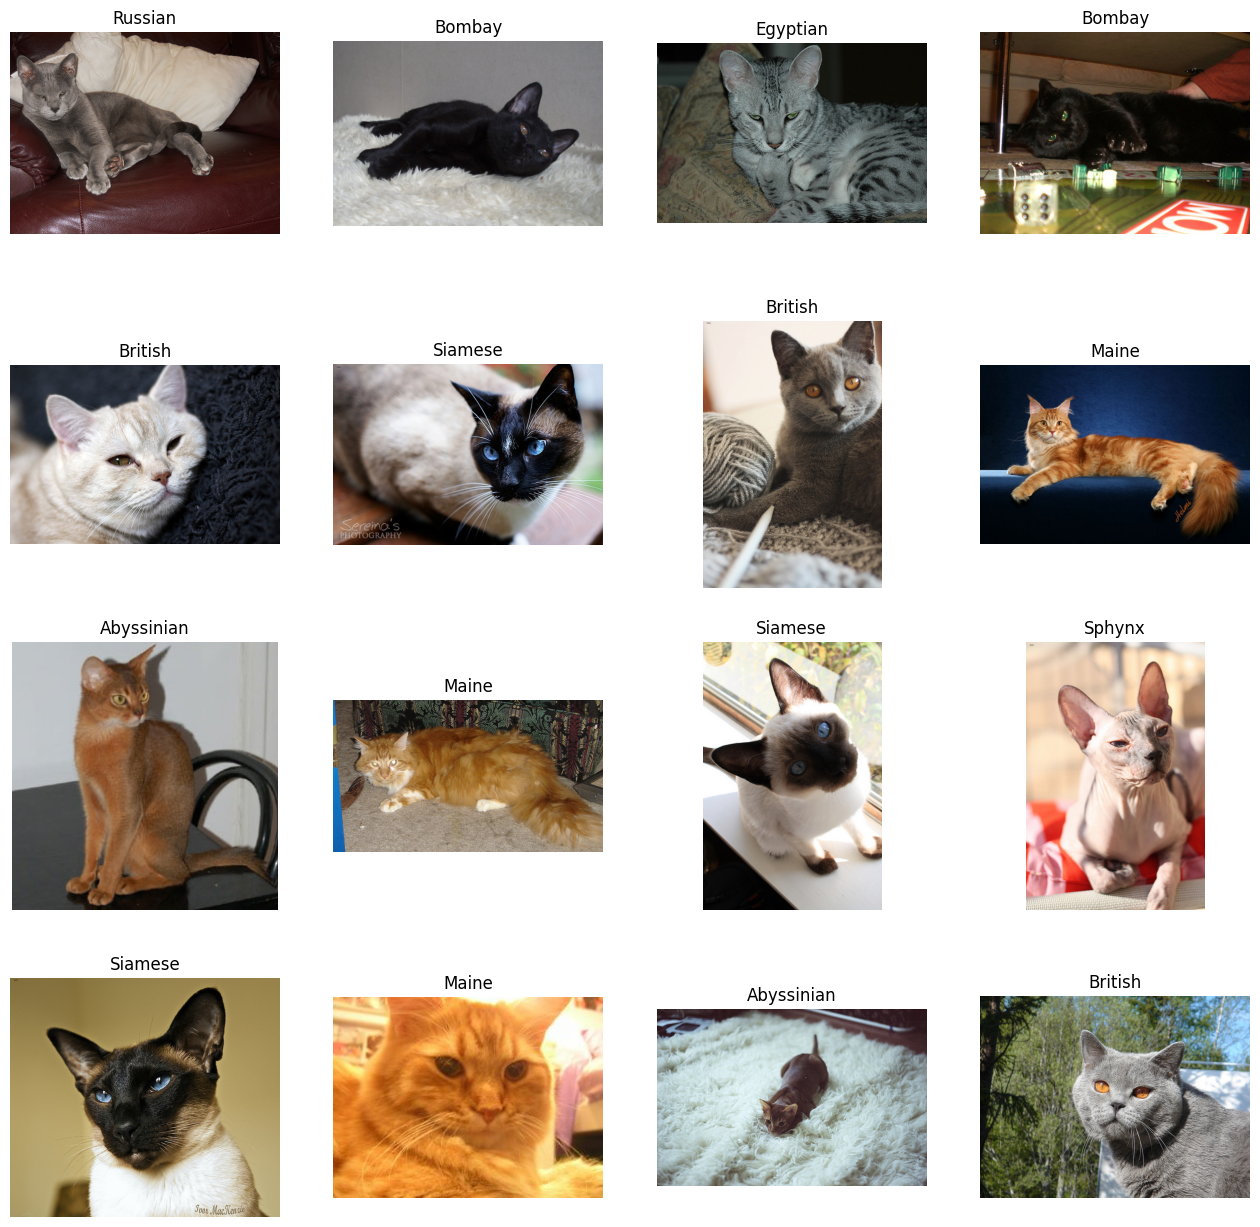

In [38]:
visualize_samples(train_gen_flow_cat)

# Generators


In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/images',
    # labels=None,
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 7390 files belonging to 1 classes.
